# AGH Modelling of Physical Systems Lab 4 (2025 March 25th)
Sylwester Arabas (sylwester.arabas@agh.edu.pl)

Work done as part of the assignment is under **Lab 04 work** section.

In [19]:
import numpy as np
from matplotlib import pyplot
from open_atmos_jupyter_utils import show_plot, show_anim

## Lab 04 work

Wojciech Neuman (neuman@student.agh.edu.pl)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from open_atmos_jupyter_utils import show_plot, show_anim

## Advection-diffusion equation

The advection-diffusion equation models how a quantity like pollutant concentration $C$ changes over time in a moving and diffusing medium. It combines the effects of transport due to fluid motion with spreading caused by diffusion. 

The formula for one-dimensional advection-diffusion equation is:

$$
\frac{\partial C}{\partial t} + u \frac{\partial C}{\partial x} - D \frac{\partial^2 C}{\partial x^2} = 0
$$

Here, $u$ represents the velocity of the fluid flow, and $D$  denotes the diffusion coefficient of the substance within the fluid.

In [21]:
def F(psi_l, psi_r, C):
    return .5 * (C + abs(C)) * psi_l + \
           .5 * (C - abs(C)) * psi_r

class Shift:
    def __init__(self, *, add, sub):
        self.add = add
        self.sub = sub
        
    
    def __radd__(self, other):
        return slice(other.start + self.add, other.stop + self.add)
    
    def __rsub__(self, other):
        return slice(other.start - self.sub, other.stop - self.sub)

one = Shift(add=1, sub=1)
hlf = Shift(add=0, sub=1)

In [22]:
x_min = 0.05
x_max = 10.05
nx = 100

x = np.linspace(x_min, x_max, nx, endpoint=False)

D = 0.05
u = 2.0
M = 0.05

t_min = 0.05
t_max = 2.0
nt = 1000

dt = (t_max - t_min) / nt

In [23]:
def analytical_solution(x, t, u, D):
    """Analytical solution for sinusoidal initial condition."""
    return np.exp(-((u ** 2) / (4 * D) + (np.pi ** 2) * D) * t) * np.sin(np.pi * x)


psi_analytical = analytical_solution(x, t_min, u, D)

In [24]:
def numerical_advection_diffusion(x, t_min, t_max, nt, u, D, M):
    psi = analytical_solution(x, t_min, u, D)
    output = [psi.copy()]
    
    for index in range(nt):
        C = np.zeros(len(psi) - 1)
        
        for i in range(1, len(psi)):
            diff = (psi[i] - psi[i - 1]) / (x[i] - x[i - 1])  # Spatial difference
            avg = (psi[i] + psi[i - 1]) / 2  # Average value for flux
            C[i - 1] = dt / (x[i] - x[i - 1]) * (u - 2 * D * diff / avg)
        
        new_psi = psi.copy()

        for i in range(1, len(psi) - 1):
            new_psi[i] -= F(psi[i], psi[i + 1], C[i]) - F(psi[i - 1], psi[i], C[i - 1])

        psi = new_psi
        output.append(psi.copy())
    
    return output

In [25]:
def rmse_error(numeric, true_value):
    return np.sqrt(np.mean((numeric - true_value) ** 2))

/var/folders/9_/vrjvn4xx4fd31flw29nx6bpr0000gp/T/ipykernel_72420/440699910.py:3: RuntimeWarning: overflow encountered in scalar multiply
  .5 * (C - abs(C)) * psi_r
/var/folders/9_/vrjvn4xx4fd31flw29nx6bpr0000gp/T/ipykernel_72420/4174327560.py:11: RuntimeWarning: invalid value encountered in scalar divide
  C[i - 1] = dt / (x[i] - x[i - 1]) * (u - 2 * D * diff / avg)
/var/folders/9_/vrjvn4xx4fd31flw29nx6bpr0000gp/T/ipykernel_72420/4174327560.py:10: RuntimeWarning: invalid value encountered in scalar add
  avg = (psi[i] + psi[i - 1]) / 2  # Average value for flux
/var/folders/9_/vrjvn4xx4fd31flw29nx6bpr0000gp/T/ipykernel_72420/4174327560.py:9: RuntimeWarning: overflow encountered in scalar divide
  diff = (psi[i] - psi[i - 1]) / (x[i] - x[i - 1])  # Spatial difference
/var/folders/9_/vrjvn4xx4fd31flw29nx6bpr0000gp/T/ipykernel_72420/440699910.py:2: RuntimeWarning: invalid value encountered in scalar add
  return .5 * (C + abs(C)) * psi_l + \
/var/folders/9_/vrjvn4xx4fd31flw29nx6bpr0000gp

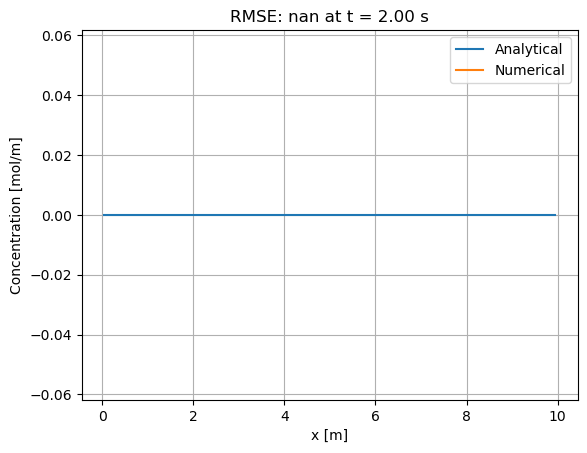

In [26]:
output = numerical_advection_diffusion(x, t_min, t_max, nt, u, D, M)

step = nt  # You can change this to any step number

analytical = analytical_solution(x, t_max, u, D)

numerical = output[step]

rmse_val = rmse_error(numerical, analytical) # RMSE error

# Create the plot
fig = plt.figure()
plt.plot(x, analytical, label='Analytical')
plt.plot(x, numerical, label='Numerical')
plt.title(f'RMSE: {rmse_val:.2e} at t = {t_max:.2f} s')
plt.xlabel('x [m]')
plt.ylabel('Concentration [mol/m]')
plt.legend()
plt.grid(True)